In [94]:
import time
import random
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
def fcfs(pages, capacity):
    memory = []
    page_faults = 0
    for page in pages:
        if page not in memory:
            if len(memory) < capacity:
                memory.append(page)
            else:
                memory.pop(0)
                memory.append(page)
            page_faults += 1
    return page_faults

In [96]:
def lru(pages, capacity):
    memory = []
    page_faults = 0
    for page in pages:
        if page not in memory:
            if len(memory) < capacity:
                memory.append(page)
            else:
                memory.pop(0)
                memory.append(page)
            page_faults += 1
        else:
            memory.remove(page)
            memory.append(page)
    return page_faults

In [97]:
def predict(pages, memory, index):
    farthest = index
    res = -1
    for i, page in enumerate(memory):
        if page not in pages[index:]:
            return i
        else:
            j = pages[index:].index(page) + index
            if j > farthest:
                farthest = j
                res = i
    return 0 if res == -1 else res


def optimal(pages, capacity):
    memory = []
    page_faults = 0
    for i in range(len(pages)):
        if pages[i] not in memory:
            if len(memory) < capacity:
                memory.append(pages[i])
            else:
                j = predict(pages, memory, i + 1)
                memory[j] = pages[i]
            page_faults += 1
    return page_faults

In [98]:
test_configs = [
    {'num_pages': 500, 'capacity': 5, 'page_range': 20},
    {'num_pages': 1000, 'capacity': 5, 'page_range': 30},
    {'num_pages': 1500, 'capacity': 8, 'page_range': 40},
    {'num_pages': 2000, 'capacity': 10, 'page_range': 50},
    {'num_pages': 2500, 'capacity': 12, 'page_range': 60},
    {'num_pages': 3000, 'capacity': 15, 'page_range': 70},
    {'num_pages': 500, 'capacity': 10, 'page_range': 50},
    {'num_pages': 1000, 'capacity': 8, 'page_range': 25},
    {'num_pages': 1500, 'capacity': 6, 'page_range': 35},
    {'num_pages': 2000, 'capacity': 5, 'page_range': 60},
]

In [99]:
all_results = []

for config in test_configs:
    pages = [random.randint(1, config['page_range']) for _ in range(config['num_pages'])]
    
    start = time.perf_counter()
    fcfs_faults = fcfs(pages, config['capacity'])
    fcfs_time = time.perf_counter() - start
    
    start = time.perf_counter()
    lru_faults = lru(pages, config['capacity'])
    lru_time = time.perf_counter() - start
    
    start = time.perf_counter()
    opt_faults = optimal(pages, config['capacity'])
    opt_time = time.perf_counter() - start
    
    all_results.append({
        'num_pages': config['num_pages'],
        'capacity': config['capacity'],
        'page_range': config['page_range'],
        'fcfs_faults': fcfs_faults,
        'fcfs_time': fcfs_time,
        'lru_faults': lru_faults,
        'lru_time': lru_time,
        'opt_faults': opt_faults,
        'opt_time': opt_time
    })

results_df = pd.DataFrame(all_results)
print(results_df)

   num_pages  capacity  page_range  fcfs_faults  fcfs_time  lru_faults  \
0        500         5          20          383   0.000041         380   
1       1000         5          30          855   0.000095         852   
2       1500         8          40         1205   0.000143        1206   
3       2000        10          50         1619   0.000203        1627   
4       2500        12          60         2005   0.000421        2004   
5       3000        15          70         2390   0.000376        2391   
6        500        10          50          412   0.000053         405   
7       1000         8          25          688   0.000086         687   
8       1500         6          35         1257   0.000133        1267   
9       2000         5          60         1851   0.000153        1854   

   lru_time  opt_faults  opt_time  
0  0.000043         243  0.001154  
1  0.000119         608  0.004150  
2  0.000152         782  0.010811  
3  0.000226        1026  0.020817  
4  0.

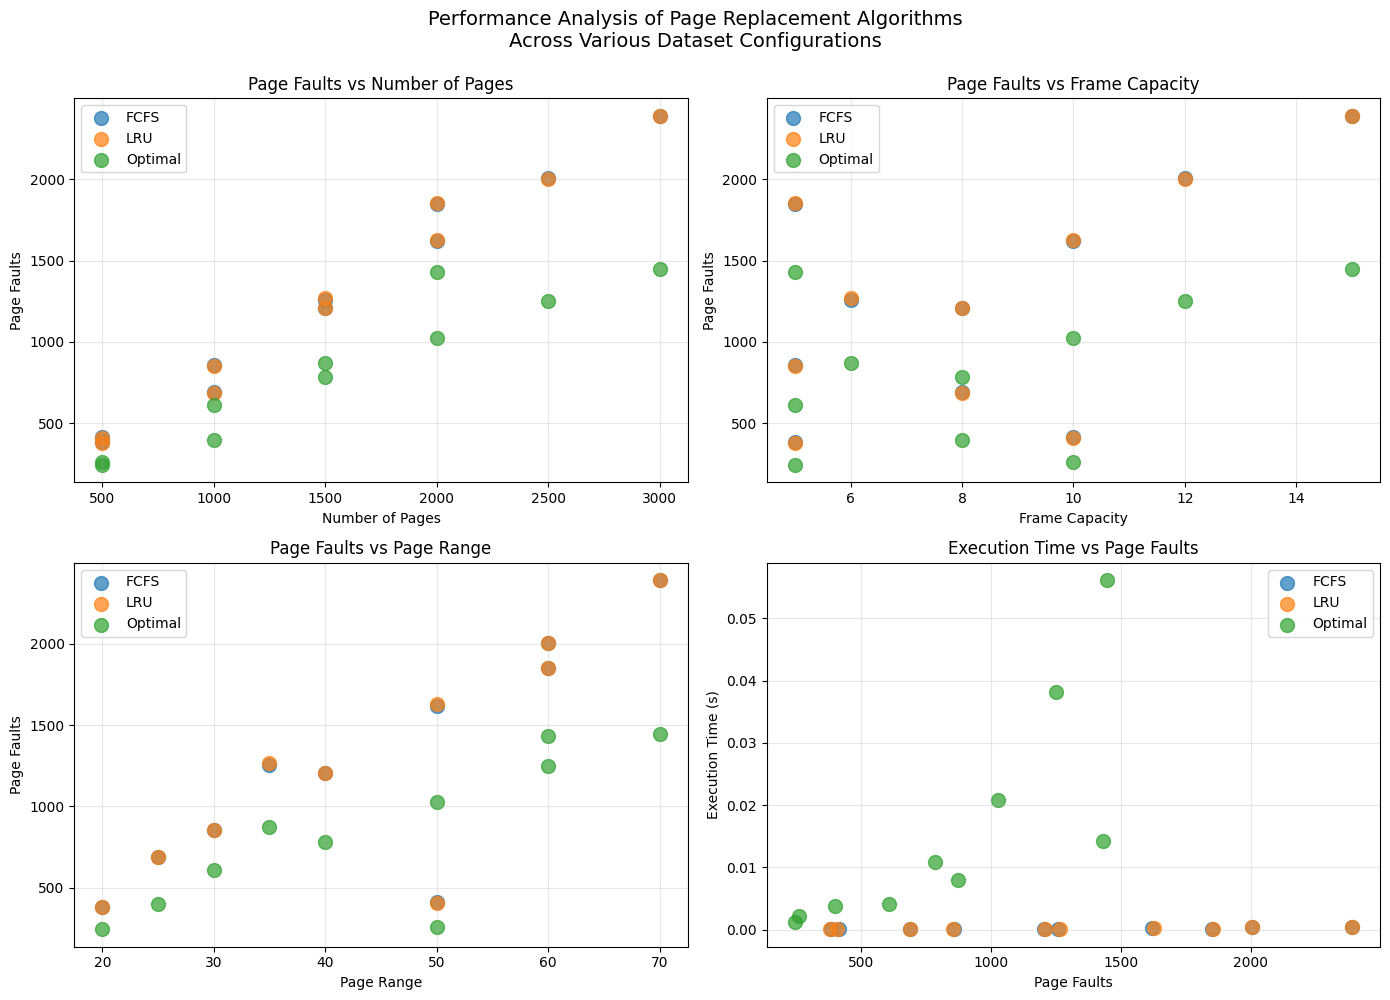

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(results_df['num_pages'], results_df['fcfs_faults'], label='FCFS', alpha=0.7, s=100)
axes[0, 0].scatter(results_df['num_pages'], results_df['lru_faults'], label='LRU', alpha=0.7, s=100)
axes[0, 0].scatter(results_df['num_pages'], results_df['opt_faults'], label='Optimal', alpha=0.7, s=100)
axes[0, 0].set_xlabel('Number of Pages')
axes[0, 0].set_ylabel('Page Faults')
axes[0, 0].set_title('Page Faults vs Number of Pages')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(results_df['capacity'], results_df['fcfs_faults'], label='FCFS', alpha=0.7, s=100)
axes[0, 1].scatter(results_df['capacity'], results_df['lru_faults'], label='LRU', alpha=0.7, s=100)
axes[0, 1].scatter(results_df['capacity'], results_df['opt_faults'], label='Optimal', alpha=0.7, s=100)
axes[0, 1].set_xlabel('Frame Capacity')
axes[0, 1].set_ylabel('Page Faults')
axes[0, 1].set_title('Page Faults vs Frame Capacity')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(results_df['page_range'], results_df['fcfs_faults'], label='FCFS', alpha=0.7, s=100)
axes[1, 0].scatter(results_df['page_range'], results_df['lru_faults'], label='LRU', alpha=0.7, s=100)
axes[1, 0].scatter(results_df['page_range'], results_df['opt_faults'], label='Optimal', alpha=0.7, s=100)
axes[1, 0].set_xlabel('Page Range')
axes[1, 0].set_ylabel('Page Faults')
axes[1, 0].set_title('Page Faults vs Page Range')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(results_df['fcfs_faults'], results_df['fcfs_time'], label='FCFS', alpha=0.7, s=100)
axes[1, 1].scatter(results_df['lru_faults'], results_df['lru_time'], label='LRU', alpha=0.7, s=100)
axes[1, 1].scatter(results_df['opt_faults'], results_df['opt_time'], label='Optimal', alpha=0.7, s=100)
axes[1, 1].set_xlabel('Page Faults')
axes[1, 1].set_ylabel('Execution Time (s)')
axes[1, 1].set_title('Execution Time vs Page Faults')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Performance Analysis of Page Replacement Algorithms\nAcross Various Dataset Configurations', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()